In [2]:
!rm -rf ./.logs/

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd

**Loading the Dataset Train and Test**

In [4]:
train = pd.read_csv("/kaggle/input/mnistdataset/mnist_train.csv")
test = pd.read_csv("/kaggle/input/mnistdataset/mnist_test.csv")

In [5]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


(None, (60000, 785))

In [8]:
test.info(), test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


(None, (10000, 785))

In [10]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:,1:785]

In [12]:
'''X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)'''

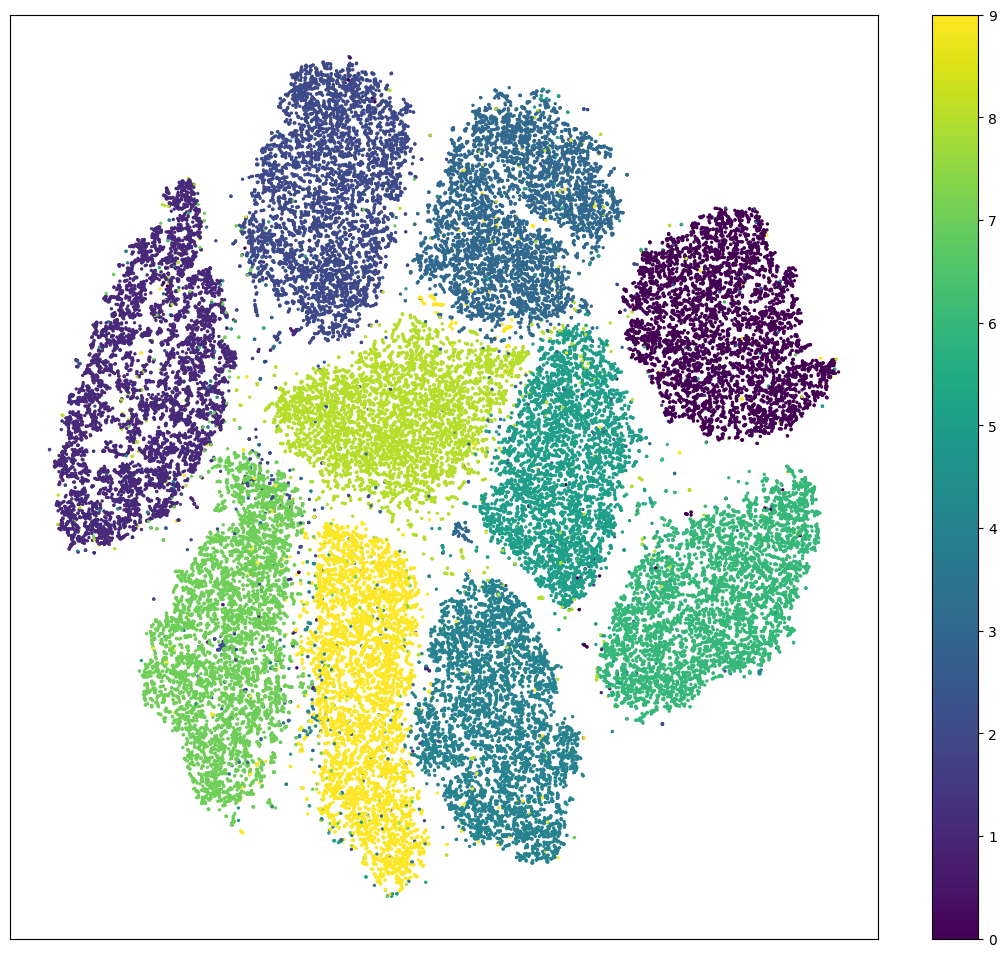

In [13]:
'''plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();'''

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [12]:
X_test.shape

(10000, 784)

In [13]:
print("X training set", X_train.shape)
print("y training set", y_train.shape)
print("X validation set", X_val.shape)
print("y validation set", y_val.shape)


X training set (48000, 784)
y training set (48000,)
X validation set (12000, 784)
y validation set (12000,)


In [14]:
X_train_reshaped = X_train.to_numpy().reshape(48000, 28, 28)
y_train_reshaped = y_train.values
X_val_reshaped = X_val.to_numpy().reshape(12000, 28, 28)
y_val_reshaped = y_val.values

X_test_reshaped = X_test.to_numpy().reshape(10000, 28, 28)


In [15]:
#printing the shapes of the reshaped

print("X training set", X_train_reshaped.shape)
print("y training set", y_train_reshaped.shape)
print("X validation set", X_val_reshaped.shape)
print("y validation set", y_val_reshaped.shape)

print("X test", X_test.shape)

X training set (48000, 28, 28)
y training set (48000,)
X validation set (12000, 28, 28)
y validation set (12000,)
X test (10000, 784)


In [16]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train_reshaped.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [17]:
# exploring the data
pd.DataFrame(X_train_reshaped[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,17,47,47,47,47,47,47,28,0
6,0,0,0,0,0,0,0,0,0,14,...,197,217,253,253,253,253,253,253,230,0
7,0,0,0,0,0,0,0,0,0,151,...,217,217,217,217,217,217,128,179,132,0
8,0,0,0,0,0,0,0,0,104,251,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,5,203,253,...,0,0,0,0,0,0,0,0,0,0


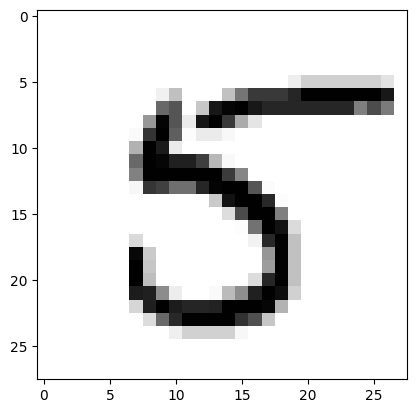

In [18]:
plt.imshow(X_train_reshaped[0], cmap = plt.cm.binary)
plt.show()

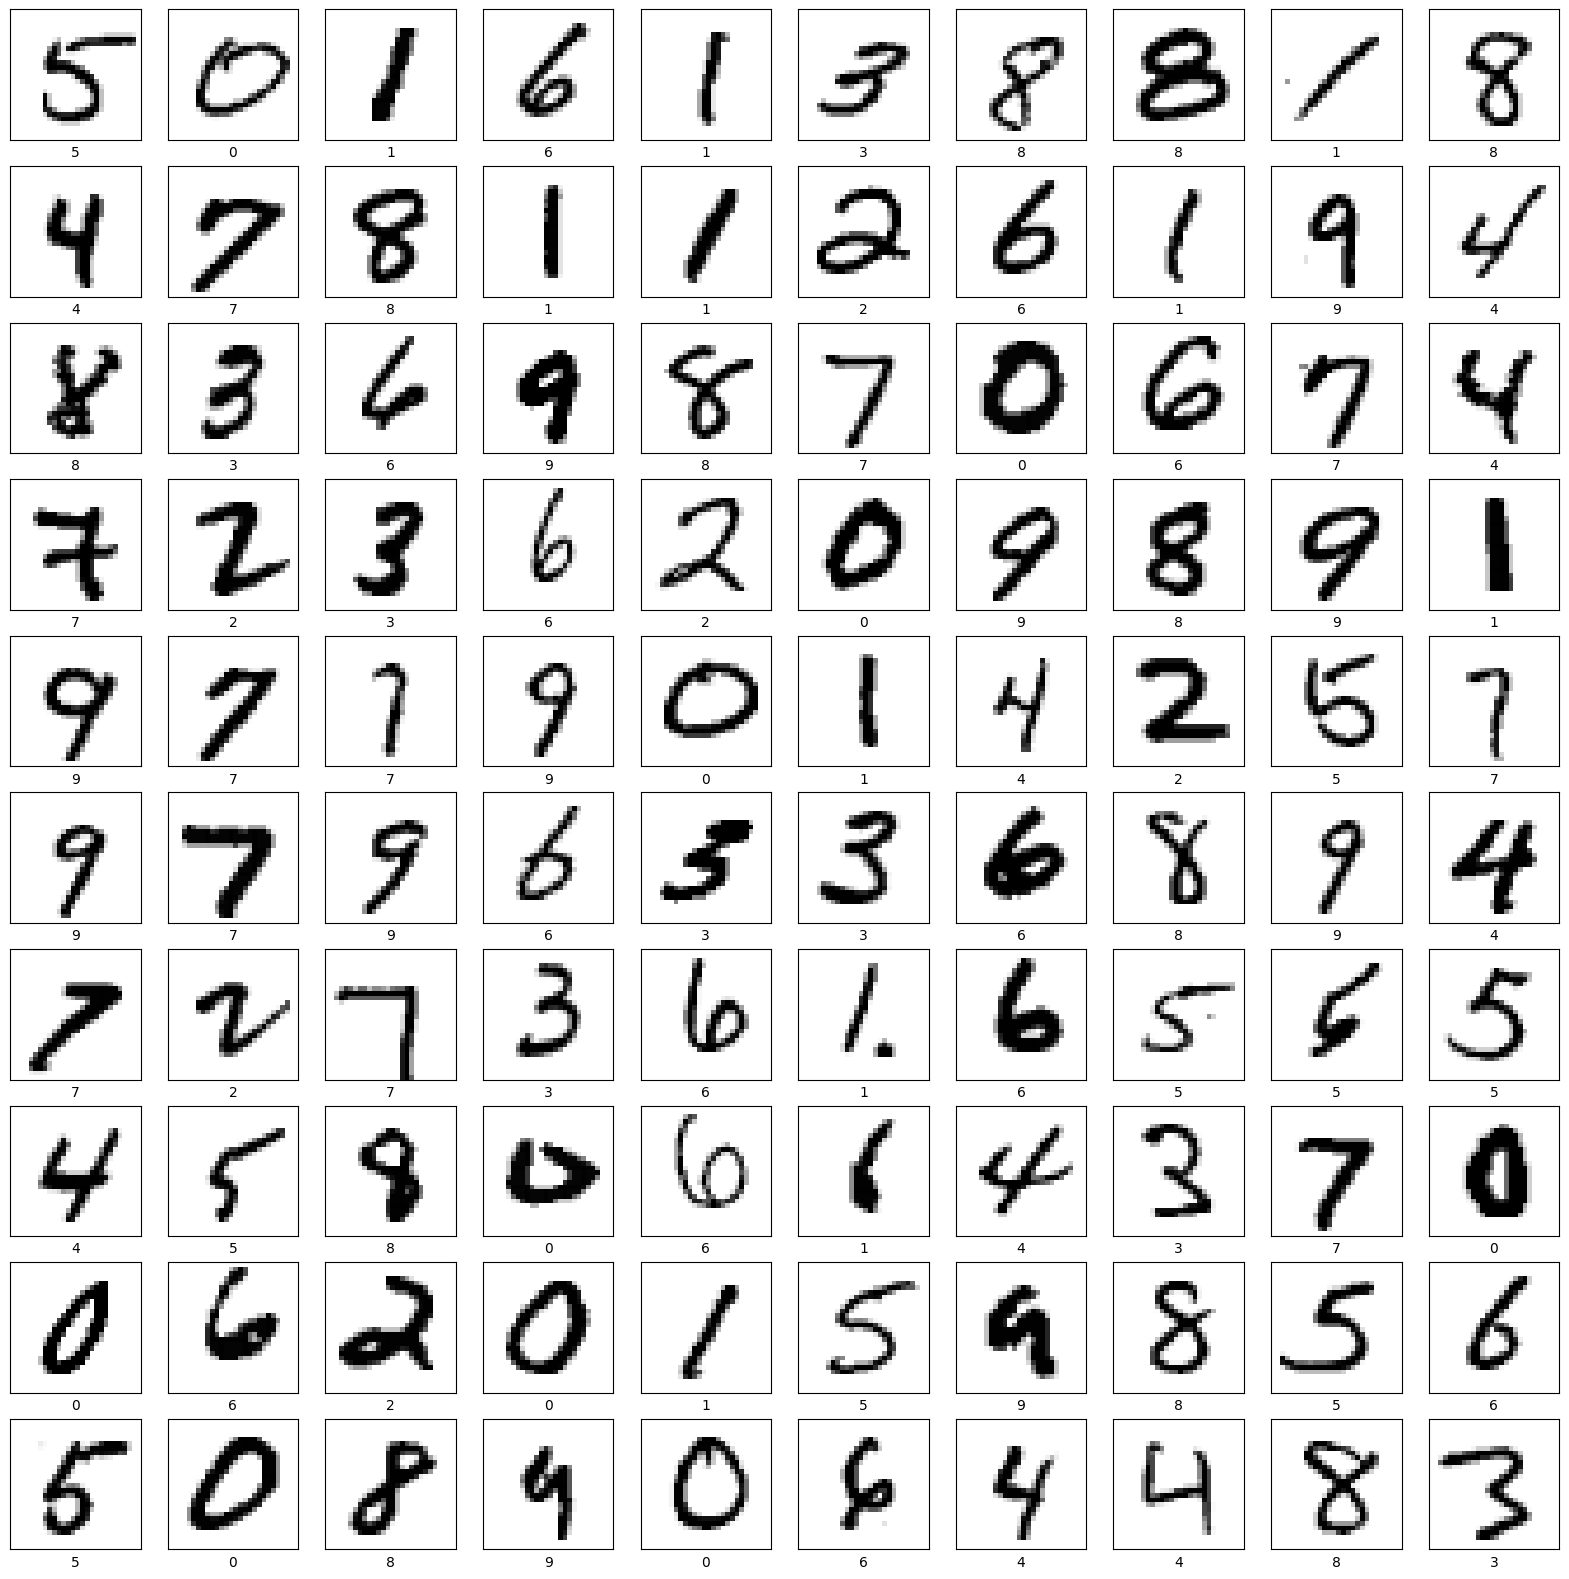

In [19]:
total_no_of_images = 100

num_cells = math.ceil(math.sqrt(total_no_of_images))
plt.figure(figsize=(20,20))

for i in range(total_no_of_images):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_reshaped[i], cmap = plt.cm.binary)
    plt.xlabel(y_train_reshaped[i])
plt.show()
    

In [20]:
x_train_with_chanels = X_train_reshaped.reshape(
    X_train_reshaped.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = X_val_reshaped.reshape(
    X_val_reshaped.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = X_test_reshaped.reshape(
    X_test_reshaped.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [21]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (48000, 28, 28, 1)
x_validation_with_chanels: (12000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [22]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [23]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.30196078],
       [0.99215686],
       [0.89411765],
       [0.08235294],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [33]:
model = tf.keras.models.Sequential()

# First Convolution Layer
model.add(tf.keras.layers.Conv2D(
    filters=8,
    kernel_size=(5, 5),
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling(),
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
))

# First Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Second Convolution Layer
model.add(tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(5, 5),
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Second Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Flatten
model.add(tf.keras.layers.Flatten())

# Fully Connected Layer
model.add(tf.keras.layers.Dense(
    units=128,
    activation='relu'
))

# Dropout
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model.add(tf.keras.layers.Dense(
    units=10,
    activation='softmax',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1767642912.711498      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [34]:
'''model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
           
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
    kernal_size=5, 
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()

))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernal_initializer = tf.keras.initializers.VarainceScaling()
))'''

'model = tf.keras.models.Sequential()\n\nmodel.add(tf.keras.layers.Convolution2D(\n    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),\n    kernel_size=5,\n    filters=8,\n    strides=1,\n    activation=tf.keras.activations.relu,\n    kernel_initializer=tf.keras.initializers.VarianceScaling()\n           \n))\n\nmodel.add(tf.keras.layers.MaxPooling2D(\n    pool_size=(2,2),\n    strides=(2,2)\n))\n\nmodel.add(tf.keras.layers.Convolution2D(\n    kernal_size=5, \n    filters=16,\n    strides=1,\n    activation=tf.keras.activations.relu,\n    kernel_initializer=tf.keras.initializers.VarianceScaling()\n\n))\n\nmodel.add(tf.keras.layers.MaxPooling2D(\n    pool_size=(2,2),\n    strides=(2,2)\n))\n\nmodel.add(tf.keras.layers.Flatten())\n\nmodel.add(tf.keras.Dense(\n    units=128,\n    activation=tf.keras.activations.relu,\n    \n))\n\nmodel.add(tf.keras.layers.Dropout(0.2))\n\nmodel.add(tf.keras.layers.Dense(\n    units=10,\n    activation=tf.keras.activations.softmax,\n    kernal_i

In [35]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

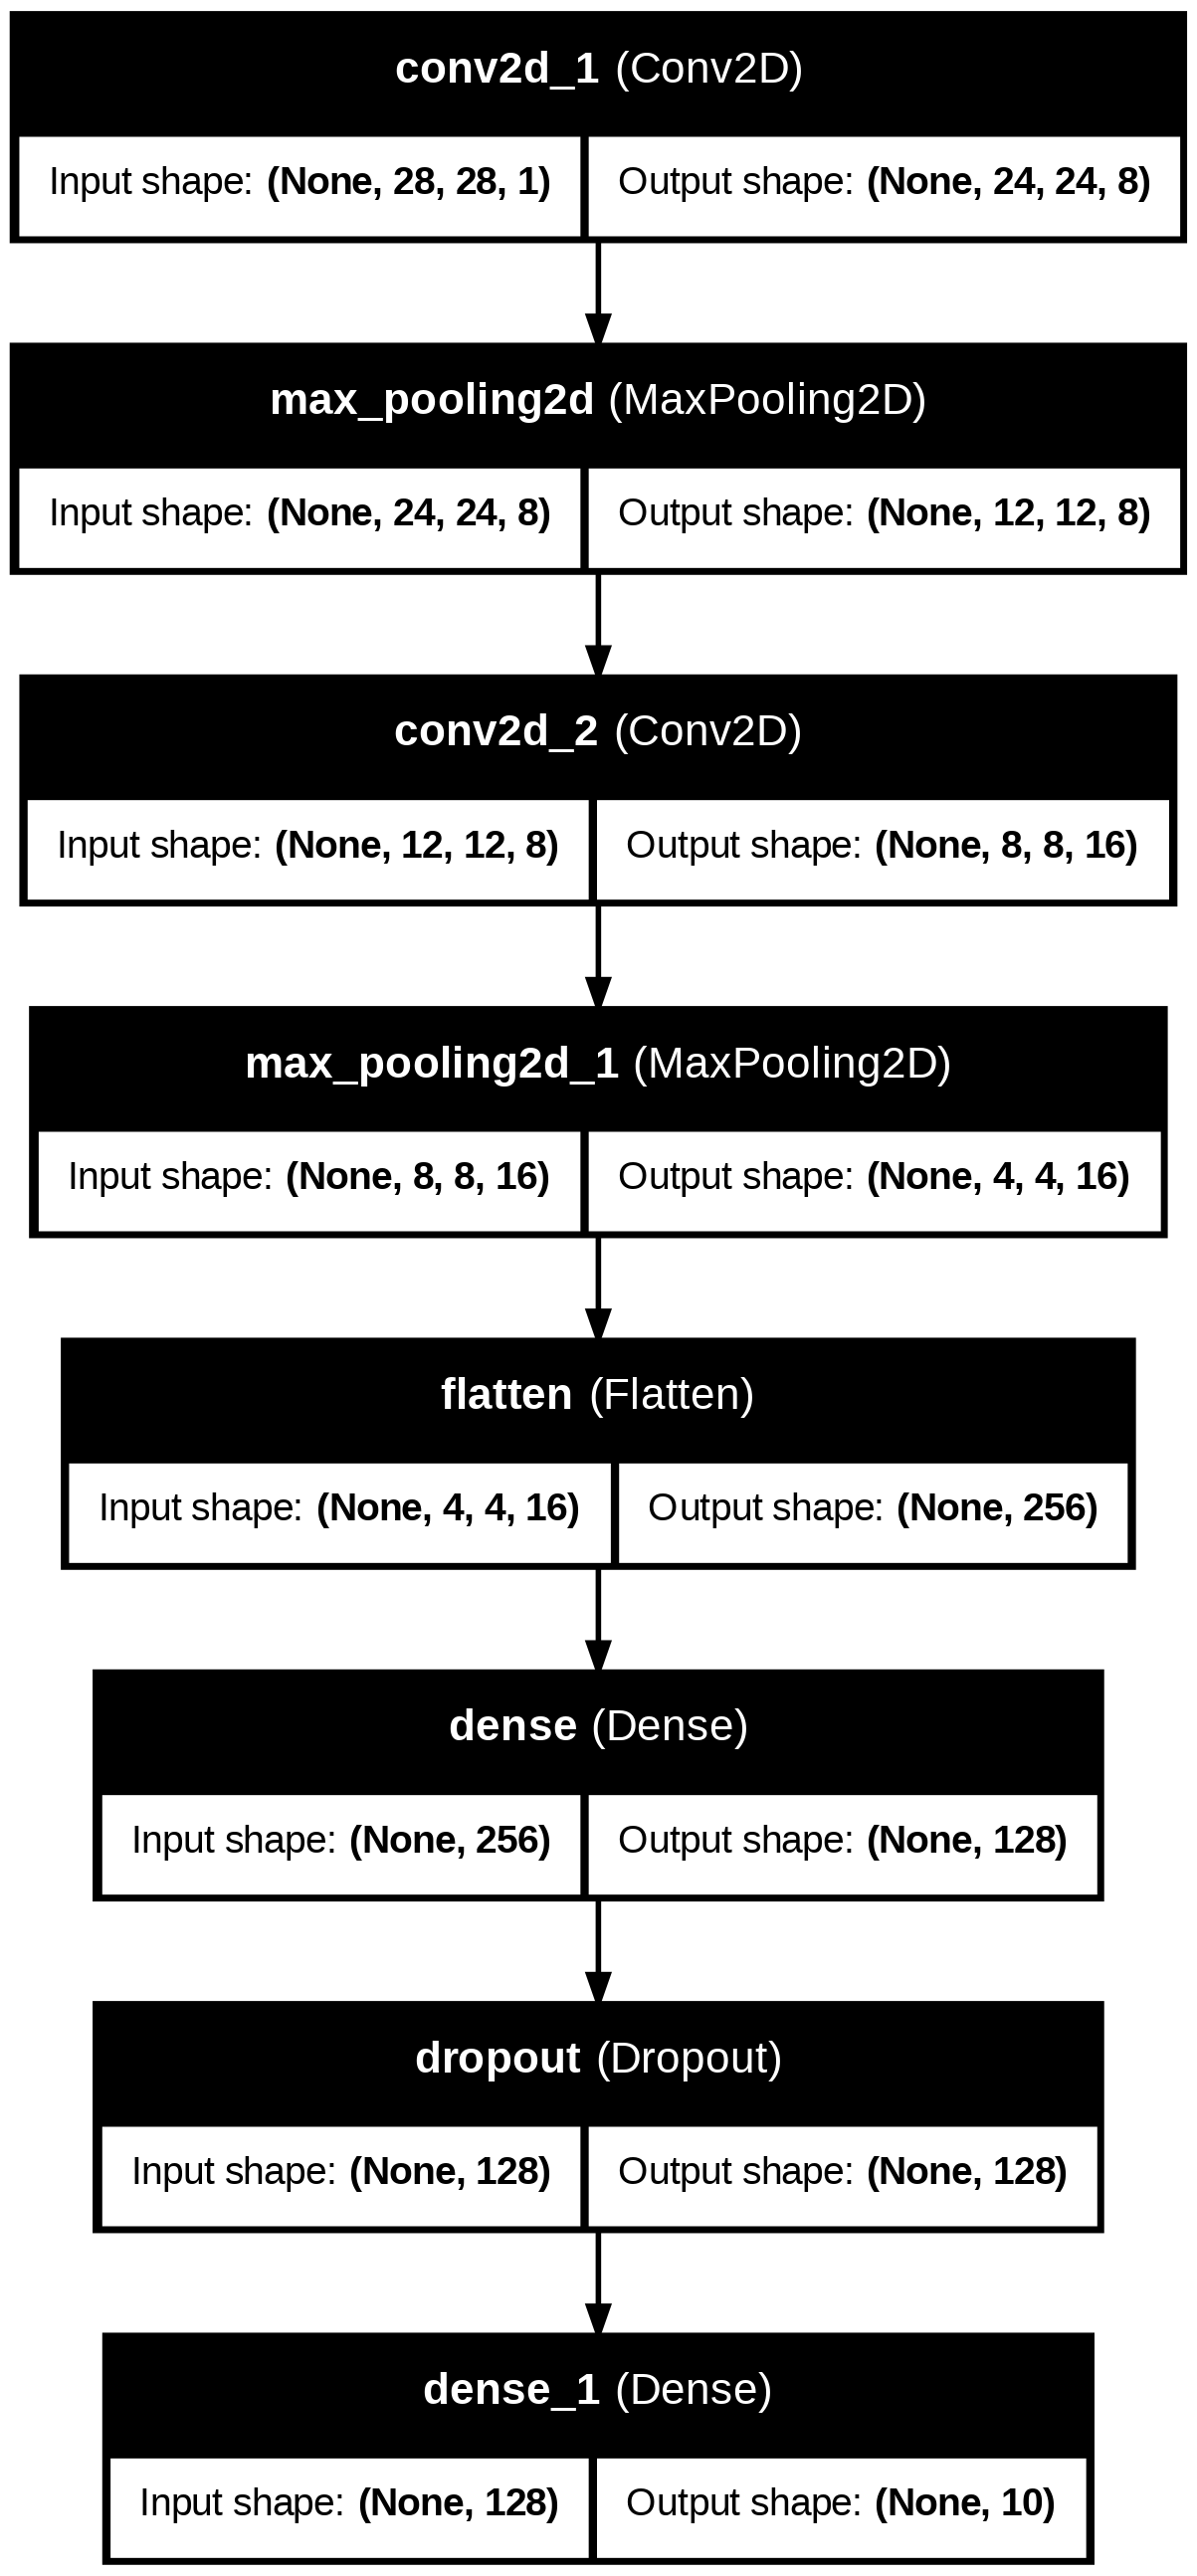

In [37]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [42]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
    
)

In [43]:
import datetime
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_reshaped,
    epochs=10,
    validation_data=(x_validation_normalized, y_val_reshaped),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10


I0000 00:00:1767643440.299510    1198 service.cc:152] XLA service 0x7a114800c390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767643440.299561    1198 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1767643440.610449    1198 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1767643442.825358    1198 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8450 - loss: 0.4961 - val_accuracy: 0.9758 - val_loss: 0.0819
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9735 - loss: 0.0846 - val_accuracy: 0.9854 - val_loss: 0.0519
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0588 - val_accuracy: 0.9855 - val_loss: 0.0473
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0466 - val_accuracy: 0.9869 - val_loss: 0.0450
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9887 - val_loss: 0.0406
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.9893 - val_loss: 0.0397
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0256 - val_accura

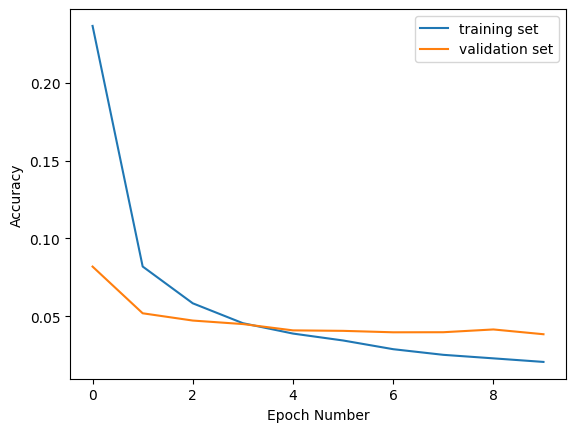

In [44]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

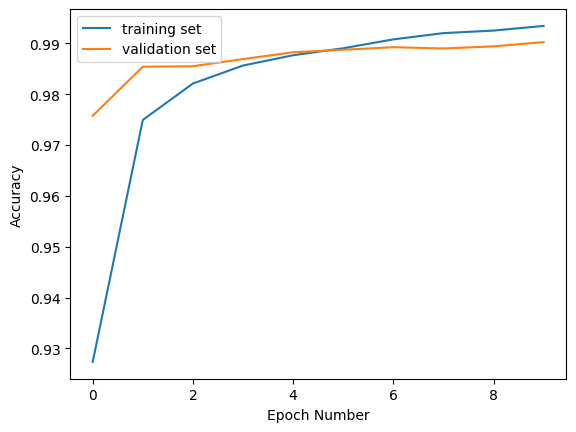

In [45]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [47]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_reshaped)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9981 - loss: 0.0067


In [48]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.006986534688621759
Train accuracy:  0.9978958368301392


In [51]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_val_reshaped)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0336


In [52]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)


Validation loss:  0.03846156969666481
Validation accuracy:  0.9902499914169312
